# import package and set read path

In [1]:
import sys
import scanpy as sc 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import random 
np.random.seed(1) 
random.seed(1) 
import os

os.chdir("/DATA2/zhangjingxiao/yxk/scDML_project/")
from scDML.metrics import evaluate_dataset
from scDML.utils import ari # sklearn bug,not using sklearn.cluster.metrics

####################################################
dataset="SubMouseBrain"
ncelltype=11
####################################################
read_dir="../evaluation/"+dataset+"/"
save_dir="../evaluation/"+dataset+"/"
os.chdir("/DATA2/zhangjingxiao/yxk/scDML_project/evaluation/")

# Raw

evaluation file exists,dont't need rerun


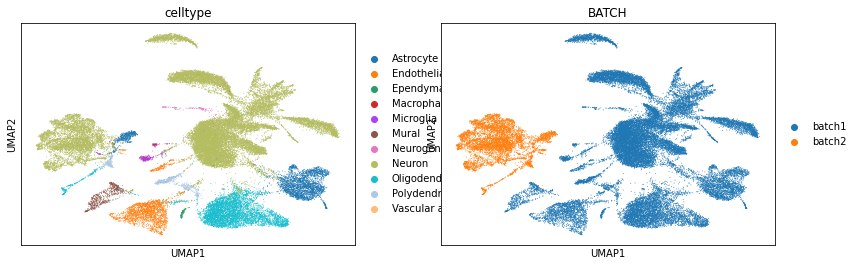

In [2]:
method="Raw"
if(os.path.exists(read_dir+method+"/"+dataset+"_"+method+"_raw.h5ad")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_raw.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH"])    

# scDML(reassign)

evaluation file exists,dont't need rerun


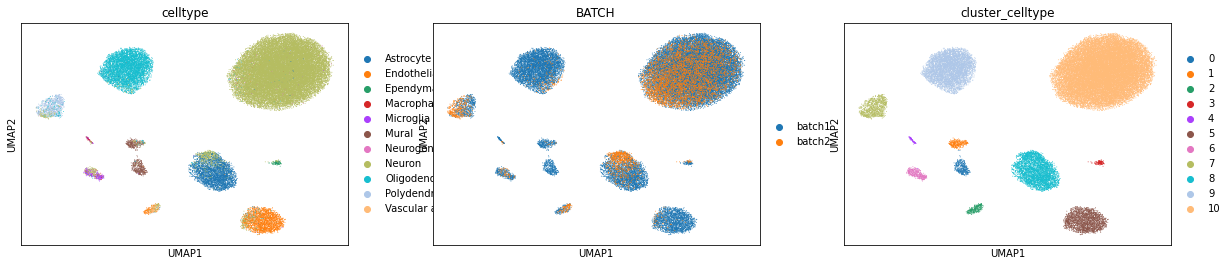

                scDML(reassign)
ARI                       0.896
NMI                       0.812
ASW_label                    --
ASW_label/batch              --
BatchKL                      --
cLISI                        --
iLISI                        --


In [3]:
method="scDML"
# scDML_script.py have been calculate umap!!!!
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","cluster_celltype"])        
    scDML_reassign=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv",index_col=0)
    print(scDML_reassign)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    from sklearn.metrics.cluster import normalized_mutual_info_score
    ARI= ari(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["cluster_celltype"].astype(str))
    NMI= normalized_mutual_info_score(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["cluster_celltype"].astype(str))
    print("ARI={}".format(ARI))
    print("NMI={}".format(NMI))
    results = {
    'ARI': np.round(ARI,3),
    'NMI': np.round(NMI,3),
    'ASW_label': "--",
    'ASW_label/batch': "--",
    #'kBET': kBET_value[0],
     'BatchKL':"--",
     'cLISI':"--",  
     'iLISI':"--"
    }
    print("....................................... calculate all metric done .................................")
    scDML_reassign= pd.DataFrame.from_dict(results, orient='index')
    scDML_reassign.columns=[method+"(reassign)"]
    scDML_reassign.to_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv")
    #scDML_reassign

# scDML(louvain)

evaluation file exists,dont't need rerun


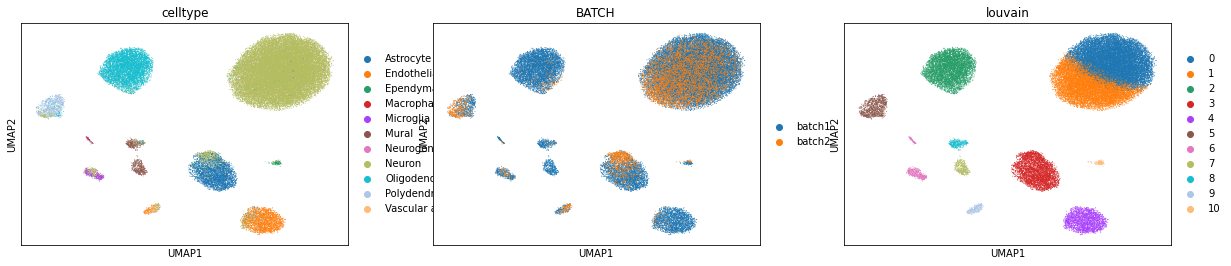

                 scDML(louvain)
ARI                       0.493
NMI                       0.686
ASW_label                 0.628
ASW_label/batch           0.766
BatchKL                   0.240
cLISI                     1.000
iLISI                     1.112


In [4]:
method="scDML"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    scDML3_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv",index_col=0)
    print(scDML3_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)

    adata_scDML=sc.AnnData(adata_integrated.obsm["X_emb"])
    adata_scDML.obs=adata_integrated.obs.copy()
    adata_integrated=adata_scDML.copy() #
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

    adata_integrated,scDML3_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    scDML3_eva.columns=[method+"(louvain)"] ## modify column names
    scDML3_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv")
    print(scDML3_eva)

    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# fastMNN

evaluation file exists,dont't need rerun


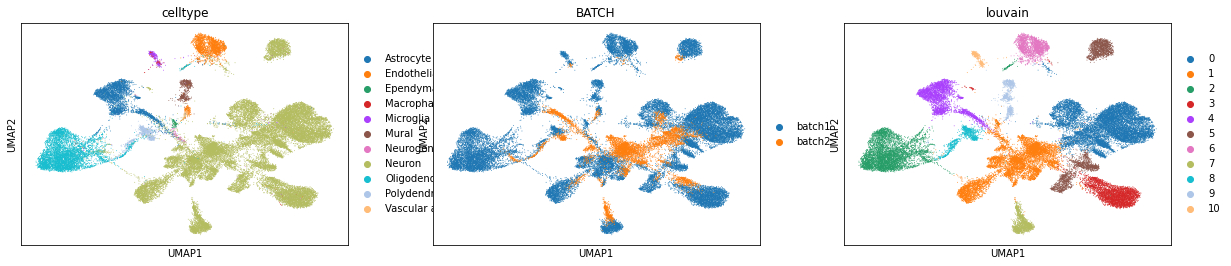

                 fastMNN
ARI                0.316
NMI                0.615
ASW_label          0.584
ASW_label/batch    0.748
BatchKL            0.537
cLISI              1.000
iLISI              1.000


In [5]:
method="fastMNN"

if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    fastMNN_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(fastMNN_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"

    adata_fastMNN=sc.read_h5ad(args_integrated)
    print(adata_fastMNN)

    adata_mnn=sc.AnnData(adata_fastMNN.obsm["X_mnn"])
    adata_mnn.obs=adata_fastMNN.obs.copy()
#     print(adata_mnn)
#     sc.tl.pca(adata_mnn)
#     sc.pp.neighbors(adata_mnn)
#     sc.tl.umap(adata_mnn)
#     sc.pl.umap(adata_mnn,color=["BATCH","celltype"])
    #######################################################
    adata_integrated=adata_mnn.copy()
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

    adata_integrated,fastMNN_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")

    plt.show()

    fastMNN_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(fastMNN_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# harmony

evaluation file exists,dont't need rerun


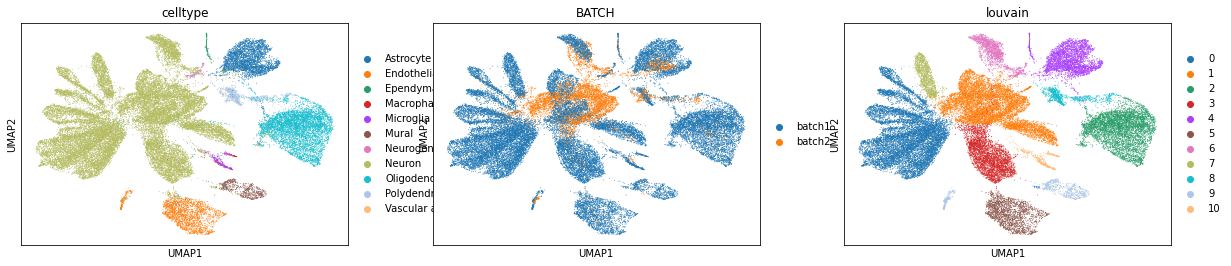

                 harmony
ARI                0.337
NMI                0.621
ASW_label          0.640
ASW_label/batch    0.834
BatchKL            0.531
cLISI              1.000
iLISI              1.000


In [6]:
method="harmony"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    harmony_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(harmony_eva)
    
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    print("================================Visulizing the embedding data================================")
    adata_harmony=sc.AnnData(adata_integrated.obsm["X_harmony"])
    adata_harmony.obs=adata_integrated.obs.copy()
    print(adata_harmony)
#     sc.tl.pca(adata_harmony)
#     sc.pp.neighbors(adata_harmony)
#     sc.tl.umap(adata_harmony)
#     sc.pl.umap(adata_harmony,color=["BATCH","celltype"])#

    adata_integrated=adata_harmony.copy()

    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
    adata_integrated,harmony_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    harmony_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(harmony_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Seurat3

evaluation file exists,dont't need rerun


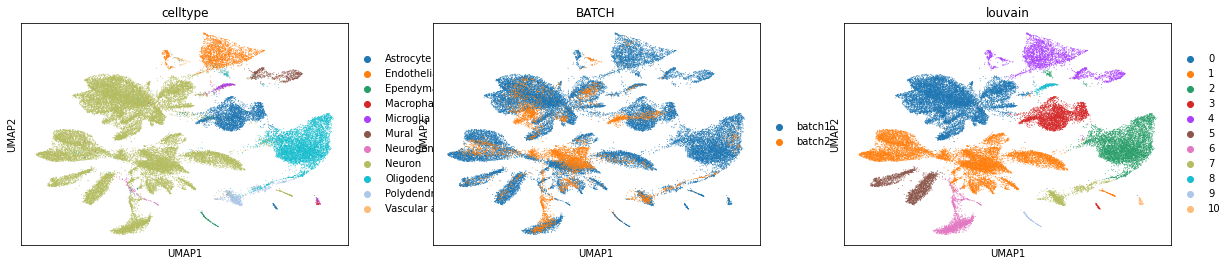

                 Seurat3
ARI                0.400
NMI                0.655
ASW_label          0.646
ASW_label/batch    0.791
BatchKL            0.413
cLISI              1.000
iLISI              1.000


In [7]:
###################################################################
method="Seurat3"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    Seurat3_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(Seurat3_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    sc.tl.pca(adata_integrated)
#     print("================================Visulizing the embedding data================================")
#     sc.pp.neighbors(adata_integrated)
#     sc.tl.umap(adata_integrated)
#     sc.pl.umap(adata_integrated,color=["BATCH","celltype"])

    adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()
    adata_integrated,Seurat3_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    Seurat3_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(Seurat3_eva)

    adata_integrated.__dict__['_raw'].__dict__['_var'] = adata_integrated.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Scanorama_raw_counts

         Falling back to preprocessing with `sc.pp.pca` and default params.


AnnData object with n_obs × n_vars = 40000 × 2000
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'BATCH', 'celltype'
    uns: 'BATCH_colors', 'celltype_colors', 'neighbors', 'umap'
    obsm: 'X_scanorama', 'X_umap'
    obsp: 'connectivities', 'distances'
...................................................................................................
..........................................method=Scanorama_raw.............................................
..............................calculate ari nmi according to nceltype=11...........................
louvain clustering result(resolution=0.18310546875):n_cluster=11
ARI: 0.5516545586577961
NMI: 0.6143301559054893
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.6839863

.................................. calculate LISI..................................................
clisi= 1.0000001192093038
ilisi= 1.0
..................................       

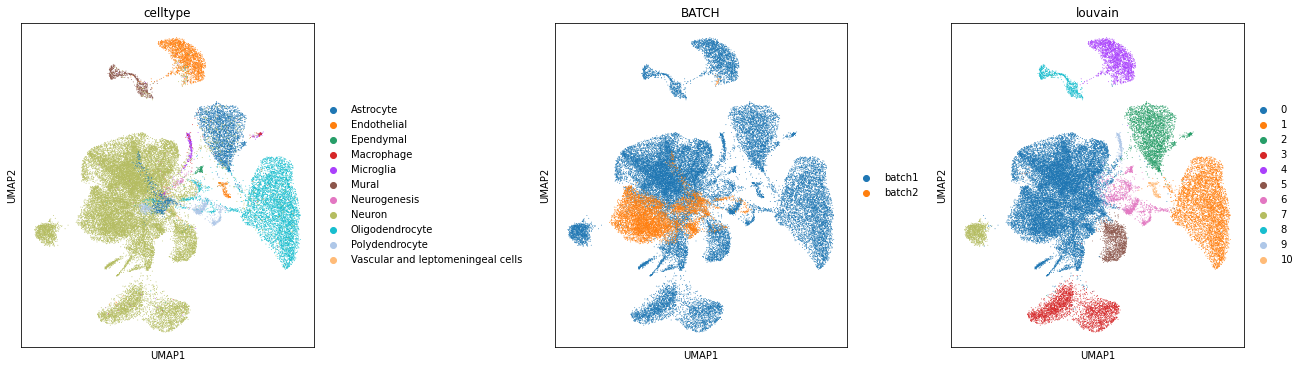

                 Scanorama_raw
ARI                      0.552
NMI                      0.614
ASW_label                0.489
ASW_label/batch          0.741
BatchKL                  0.684
cLISI                    1.000
iLISI                    1.000


In [8]:
###################################################################
method="Scanorama_raw"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    Scanorama_raw_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(Scanorama_raw_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    #print("================================Visulizing the embedding data================================")
#     sc.tl.pca(adata_integrated)
#     sc.pp.neighbors(adata_integrated)
#     sc.tl.umap(adata_integrated)
#     sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
    
    adata_Scanorama_raw=sc.AnnData(adata_integrated.obsm["X_scanorama"])
    adata_Scanorama_raw.obs=adata_integrated.obs.copy()
    adata_integrated=adata_Scanorama_raw.copy() #
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

    adata_integrated,Scanorama_raw_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")

    plt.show()

    Scanorama_raw_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(Scanorama_raw_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Scanorama(Log 1p)

         Falling back to preprocessing with `sc.pp.pca` and default params.


AnnData object with n_obs × n_vars = 40000 × 2000
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'BATCH', 'celltype', 'n_counts'
    uns: 'BATCH_colors', 'celltype_colors', 'neighbors', 'umap'
    obsm: 'X_scanorama', 'X_umap'
    obsp: 'connectivities', 'distances'
...................................................................................................
..........................................method=Scanorama.............................................
..............................calculate ari nmi according to nceltype=11...........................
louvain clustering result(resolution=0.152587890625):n_cluster=11
ARI: 0.5568003912368493
NMI: 0.6404722641985782
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.698036

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 1.0
..................................        calcul

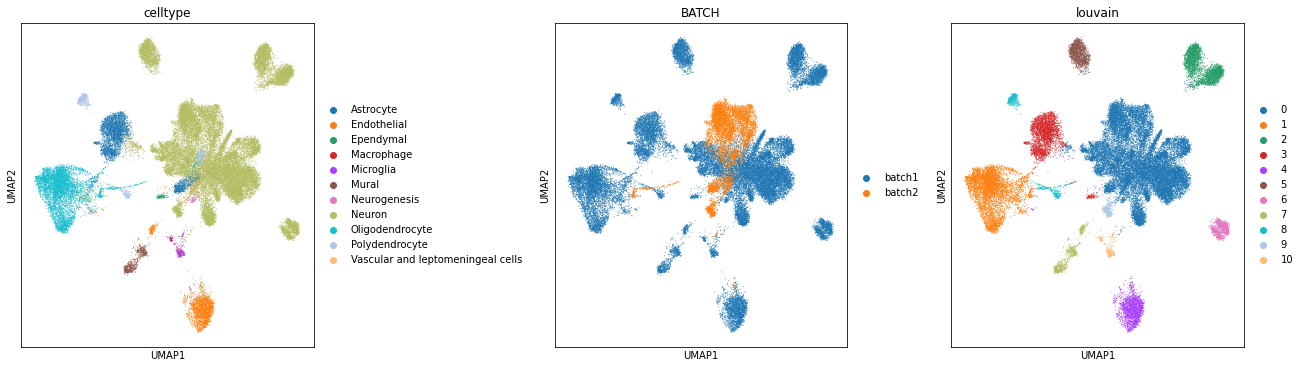

                 Scanorama
ARI                  0.557
NMI                  0.640
ASW_label            0.508
ASW_label/batch      0.765
BatchKL              0.698
cLISI                1.000
iLISI                1.000


In [9]:
###################################################################
method="Scanorama"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    Scanorama_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(Scanorama_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    #print("================================Visulizing the embedding data================================")
#     sc.tl.pca(adata_integrated)
#     sc.pp.neighbors(adata_integrated)
#     sc.tl.umap(adata_integrated)
#     sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
    
    adata_scanorama=sc.AnnData(adata_integrated.obsm["X_scanorama"])
    adata_scanorama.obs=adata_integrated.obs.copy()
    adata_integrated=adata_scanorama.copy() #
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

    adata_integrated,Scanorama_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")

    plt.show()

    Scanorama_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(Scanorama_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# INSCT

evaluation file exists,dont't need rerun


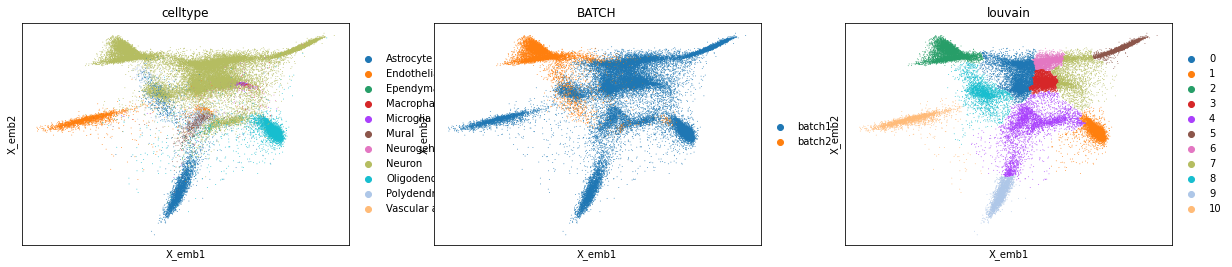

                 INSCT
ARI              0.164
NMI              0.454
ASW_label        0.450
ASW_label/batch  0.507
BatchKL          0.542
cLISI            1.001
iLISI            1.000


In [10]:
method="INSCT"
## use emb
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.embedding(adata_evaluated,basis="X_emb",color=["celltype","BATCH","louvain"])    
    INSCT_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(INSCT_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    print("================================Visulizing the embedding data================================")
    sc.tl.pca(adata_integrated)
    sc.pp.neighbors(adata_integrated)
    sc.tl.umap(adata_integrated)
    sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
    adata_integrated,INSCT_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.embedding(adata_integrated,basis="emb",color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.embedding(adata_integrated,basis="emb",color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.embedding(adata_integrated,basis="emb",color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    INSCT_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(INSCT_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# BBKNN

AnnData object with n_obs × n_vars = 40000 × 2
    obs: 'BATCH', 'celltype'
    uns: 'BATCH_colors', 'celltype_colors'
    obsm: 'X_emb'
================================Visulizing the embedding data================================
...................................................................................................
..........................................method=BBKNN.............................................
..............................calculate ari nmi according to nceltype=11...........................
louvain clustering result(resolution=0.030517578125):n_cluster=11
ARI: 0.1857592026404976
NMI: 0.48828806475928377
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.5410576

.................................. calculate LISI..................................................
clisi= 1.0000001192093038
ilisi= 1.0
..................................        calculate ASW      ................................

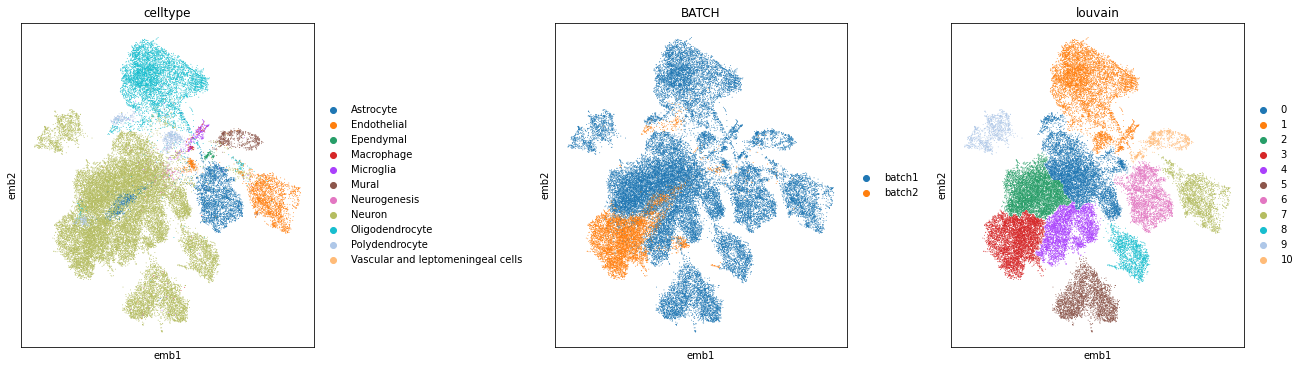

                 BBKNN
ARI              0.186
NMI              0.488
ASW_label        0.527
ASW_label/batch  0.483
BatchKL          0.541
cLISI            1.000
iLISI            1.000


In [11]:
method="BBKNN"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.embedding(adata_evaluated,basis="X_emb",color=["celltype","BATCH","louvain"])    
    BBKNN_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(BBKNN_eva)  
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    print("================================Visulizing the embedding data================================")
#     sc.tl.pca(adata_integrated)
#     sc.pp.neighbors(adata_integrated)
#     sc.tl.umap(adata_integrated)
#     sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
    adata_integrated,BBKNN_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.embedding(adata_integrated,basis="emb",color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.embedding(adata_integrated,basis="emb",color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.embedding(adata_integrated,basis="emb",color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    BBKNN_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(BBKNN_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Liger

evaluation file exists,dont't need rerun


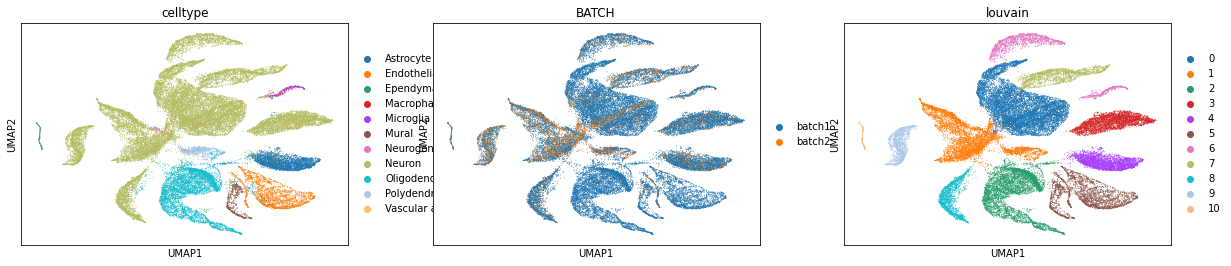

                 liger
ARI              0.249
NMI              0.533
ASW_label        0.504
ASW_label/batch  0.782
BatchKL          0.243
cLISI            1.000
iLISI            1.221


In [12]:
method="liger"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    liger_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(liger_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    print("================================Visulizing the embedding data================================")
    adata_liger=sc.AnnData(adata_integrated.obsm["X_iNMF"])
    adata_liger.obs=adata_integrated.obs.copy()
    print(adata_liger)
    sc.tl.pca(adata_liger)
    sc.pp.neighbors(adata_liger)
    sc.tl.umap(adata_liger)
    sc.pl.umap(adata_liger,color=["BATCH","celltype"])

    adata_integrated=adata_liger.copy()

    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

    adata_integrated,liger_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    liger_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(liger_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# BERMUDA

evaluation file exists,dont't need rerun


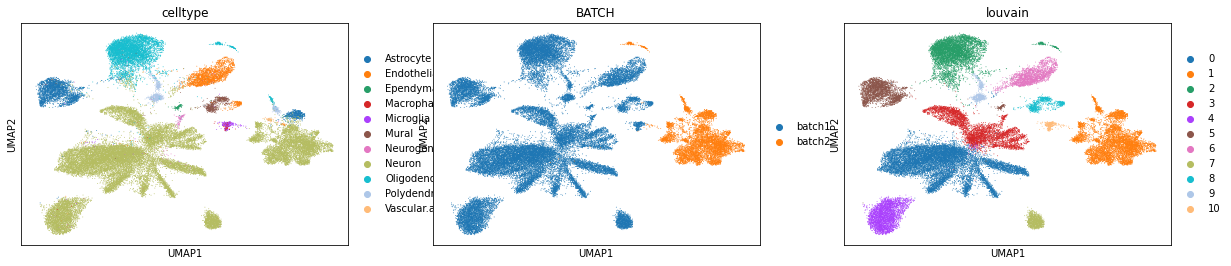

                 BERMUDA
ARI                0.318
NMI                0.586
ASW_label          0.650
ASW_label/batch    0.508
BatchKL            0.648
cLISI              1.000
iLISI              1.000


In [13]:
method="BERMUDA"

if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    bermuda_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(bermuda_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    if(os.path.exists(args_integrated)):
        print(args_integrated)
        adata_integrated=sc.read_h5ad(args_integrated)
        print(adata_integrated)
        print("================================Visulizing the embedding data================================")
        sc.tl.pca(adata_integrated)
        sc.pp.neighbors(adata_integrated)
        sc.tl.umap(adata_integrated)
        sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
        adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
        adata_integrated,bermuda_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

        fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
        sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
        sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
        sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
        plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
        plt.show()
        bermuda_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
        print(bermuda_eva)
        adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    else:
        fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
        plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
        plt.show()    
        results = {
        'ARI': "--",
        'NMI': "--",
        'ASW_label': "--",
        'ASW_label/batch': "--",
        #'kBET': kBET_value[0],
         'BatchKL':"--",
         'cLISI':"--",  
         'iLISI':"--"
        }
        print("....................................... calculate all metric done .................................")
        bermuda_eva = pd.DataFrame.from_dict(results, orient='index')
        bermuda_eva.columns=[method]
        bermuda_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
        bermuda_eva

# scVI

AnnData object with n_obs × n_vars = 40000 × 10
    obs: 'BATCH', 'celltype'
    uns: 'BATCH_colors', 'celltype_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
================================Visulizing the embedding data================================
...................................................................................................
..........................................method=scVI.............................................
..............................calculate ari nmi according to nceltype=11...........................
louvain clustering result(resolution=0.08392333984375):n_cluster=11
ARI: 0.31890530139250406
NMI: 0.6158058536114275
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.4443005

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 1.01903889746884

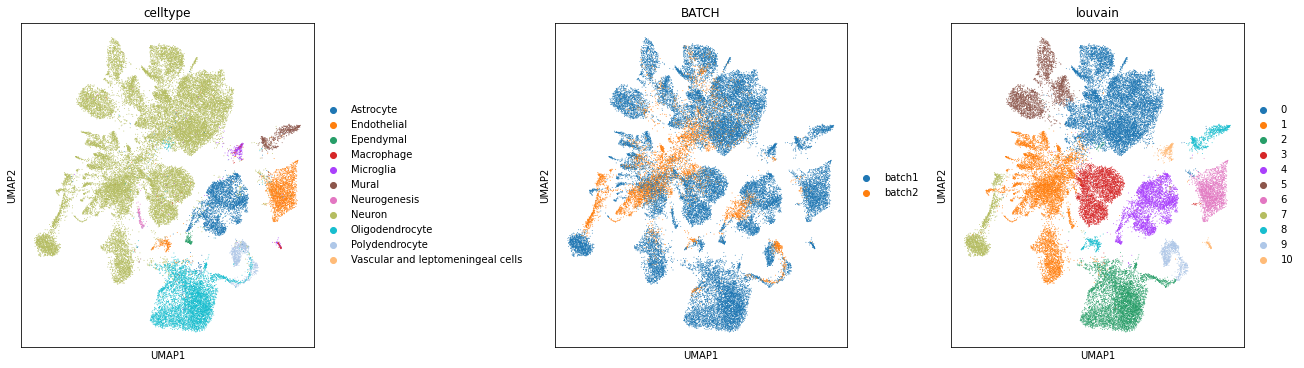

                  scVI
ARI              0.319
NMI              0.616
ASW_label        0.562
ASW_label/batch  0.801
BatchKL          0.444
cLISI            1.000
iLISI            1.019


In [14]:
method="scVI"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    scVI_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(scVI_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    print("================================Visulizing the embedding data================================")
#     sc.tl.pca(adata_integrated)
#     sc.pp.neighbors(adata_integrated)
#     sc.tl.umap(adata_integrated)
#     sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
    adata_integrated,scVI_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    scVI_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(scVI_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# carDEC(resign)

In [15]:
method="carDEC"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","reassign_label"])    
    carDEC_reassign=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv",index_col=0)
    print(carDEC_reassign)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    from sklearn.metrics.cluster import adjusted_rand_score,normalized_mutual_info_score
    ARI= adjusted_rand_score(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["reassign_label"].astype(str))
    NMI= normalized_mutual_info_score(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["reassign_label"].astype(str))
    print("ARI={}".format(ARI))
    print("NMI={}".format(NMI))
    results = {
    'ARI': np.round(ARI,3),
    'NMI': np.round(NMI,3),
    'ASW_label': "--",
    'ASW_label/batch': "--",
    #'kBET': kBET_value[0],
     'BatchKL':"--",
     'cLISI':"--",  
     'iLISI':"--"
    }
    print("....................................... calculate all metric done .................................")
    carDEC_reassign= pd.DataFrame.from_dict(results, orient='index')
    carDEC_reassign.columns=[method+"(reassign)"]
    carDEC_reassign.to_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv")

AnnData object with n_obs × n_vars = 40000 × 32
    obs: 'celltype', 'reassign_label', 'BATCH'
    uns: 'BATCH_colors', 'celltype_colors', 'neighbors', 'pca', 'reassign_label_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
ARI=0.30292394990334387
NMI=0.5635414698320943
....................................... calculate all metric done .................................


# carDEC(louvain)

AnnData object with n_obs × n_vars = 40000 × 32
    obs: 'celltype', 'reassign_label', 'BATCH'
    uns: 'BATCH_colors', 'celltype_colors', 'neighbors', 'pca', 'reassign_label_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
...................................................................................................
..........................................method=carDEC.............................................
..............................calculate ari nmi according to nceltype=11...........................
louvain clustering result(resolution=0.1220703125):n_cluster=11
ARI: 0.30778584934030456
NMI: 0.584557053306913
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.5757416

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 1.0
..................................        calculate ASW      .....

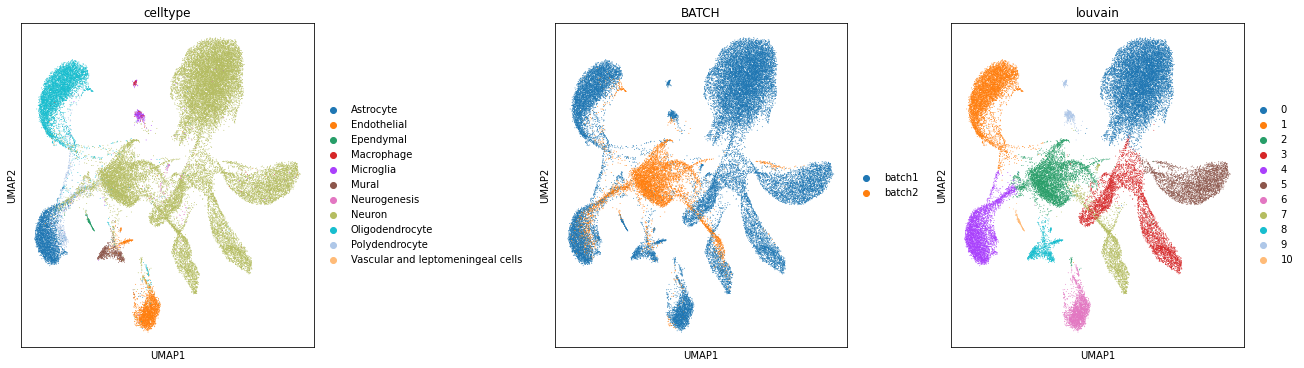

                 carDEC(louvain)
ARI                        0.308
NMI                        0.585
ASW_label                  0.707
ASW_label/batch            0.677
BatchKL                    0.576
cLISI                      1.000
iLISI                      1.000


In [16]:
method="carDEC"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    carDEC_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv",index_col=0)
    print(carDEC_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)

    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()## add X_emb
    adata_integrated,carDEC3_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

#     sc.tl.pca(adata_integrated)
#     sc.pp.neighbors(adata_integrated)
#     sc.tl.umap(adata_integrated)
#     sc.pl.umap(adata_integrated,color=["BATCH","celltype","louvain"])#
    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    carDEC3_eva.columns=[method+"(louvain)"] ## modify column names
    carDEC3_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv")
    print(carDEC3_eva)

    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# iSMNN

In [17]:
# method="iSMNN"
# if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
#     print("evaluation file exists,dont't need rerun")
# else:
#     args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"

#     adata_integrated=sc.read_h5ad(args_integrated)
#     print(adata_integrated)
#     adata_integrated.obs["celltype"]=adata_integrated.obs["cell.anno"].copy()
#     adata_integrated.obs["BATCH"]=adata_integrated.obs["batch_id"].copy()
#     adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()
#     adata_integrated,iSMNN_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

#     fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
#     sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
#     sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
#     sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
#     plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#     plt.show()

#     iSMNN_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
#     print(iSMNN_eva)
#     adata_integrated.__dict__['_raw'].__dict__['_var'] = adata_integrated.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})
#    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# summary evaluation of all method to  table

In [18]:

method_list=["scDML","fastMNN","harmony","Seurat3","Scanorama","INSCT","BBKNN","liger","BERMUDA","scVI","carDEC"]

df_ls=[]
for method in method_list:
    #print(method)
    if(method=="scDML" or method=="carDEC"):
        method_eva1=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv",index_col=0)
        df_ls.append(method_eva1)
        method_eva2=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv",index_col=0)
        df_ls.append(method_eva2)
    else:
        method_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
        df_ls.append(method_eva)

result = pd.concat(df_ls, join='outer', axis=1)
result.columns=["scDML(reassign)","scDML(louvain)"]+method_list[1:-1]+["carDEC(reassign)","carDEC(louvain)"]
result.index.name=dataset ## add title for column names 
#result=result.round(3) ## only save 3 precision of float
result.to_csv(save_dir+dataset+"_evaluation.csv")
result

,scDML(reassign),scDML(louvain),fastMNN,harmony,Seurat3,Scanorama,INSCT,BBKNN,liger,BERMUDA,scVI,carDEC(reassign),carDEC(louvain)
SubMouseBrain,,,,,,,,,,,,,
ARI,0.896,0.493,0.316,0.337,0.400,0.557,0.164,0.186,0.249,0.318,0.319,0.303,0.308
NMI,0.812,0.686,0.615,0.621,0.655,0.640,0.454,0.488,0.533,0.586,0.616,0.564,0.585
ASW_label,--,0.628,0.584,0.640,0.646,0.508,0.450,0.527,0.504,0.650,0.562,--,0.707
ASW_label/batch,--,0.766,0.748,0.834,0.791,0.765,0.507,0.483,0.782,0.508,0.801,--,0.677
BatchKL,--,0.240,0.537,0.531,0.413,0.698,0.542,0.541,0.243,0.648,0.444,--,0.576
cLISI,--,1.000,1.000,1.000,1.000,1.000,1.001,1.000,1.000,1.000,1.000,--,1.000
iLISI,--,1.112,1.000,1.000,1.000,1.000,1.000,1.000,1.221,1.000,1.019,--,1.000
